# Final Corrected Code
# ✅ Save Model and Scaler

In [1]:
import tensorflow as tf
import numpy as np
import pickle as pkl
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes.csv")  # Update with your dataset path

# Prepare X and y
X = df.drop(columns="Outcome", axis=1)
y = df["Outcome"]

# Feature Scaling
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# Save StandardScaler
pkl.dump(scalar, open("scaler.pkl", "wb"))

# Train/Test Split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=2)

# One-Hot Encoding
num_classes = len(np.unique(train_y))
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)

# Build Model with Regularization & Dropout
model = Sequential()
model.add(Dense(64, input_dim=train_X.shape[1], activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Train Model
history = model.fit(train_X, train_y, epochs=150, batch_size=20, validation_data=(test_X, test_y), callbacks=[early_stopping])

# Save Model
model.save("deeplearning.keras")


Epoch 1/150


d:\new\Deeplearning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5593 - loss: 1.0366 - val_accuracy: 0.7013 - val_loss: 0.8899
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6697 - loss: 0.9131 - val_accuracy: 0.7273 - val_loss: 0.8250
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6984 - loss: 0.8338 - val_accuracy: 0.7468 - val_loss: 0.7803
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7544 - loss: 0.7617 - val_accuracy: 0.7727 - val_loss: 0.7436
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7756 - loss: 0.7152 - val_accuracy: 0.7727 - val_loss: 0.7227
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7619 - loss: 0.7052 - val_accuracy: 0.7662 - val_loss: 0.7038
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7713 - loss: 0.6922 - val_accuracy: 0.7662 - val_loss: 0.6923
Epoch 8/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7237 - loss: 0.7090 - val_accuracy: 0.7662 - val_loss: 0.

# ✅ Load Model and Make Predictions

In [2]:
# Load StandardScaler
with open("scaler.pkl", "rb") as f:
    scalar = pkl.load(f)

# Load Keras Model
model = tf.keras.models.load_model("deeplearning.keras")

# Test Data Input
input_data = (6,148,72,35,0,33.6,0.627,50)
data = np.array(input_data).reshape(1, -1)  # Reshape for prediction

# Scale Data
std_data = scalar.transform(data)

# Predict
prediction = model.predict(std_data)
predicted_class = np.argmax(prediction)  # Get class with highest probability

# Output Prediction
if predicted_class == 1:
    print("The patient has diabetes")
else:
    print("The patient does not have diabetes")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The patient has diabetes


d:\new\Deeplearning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


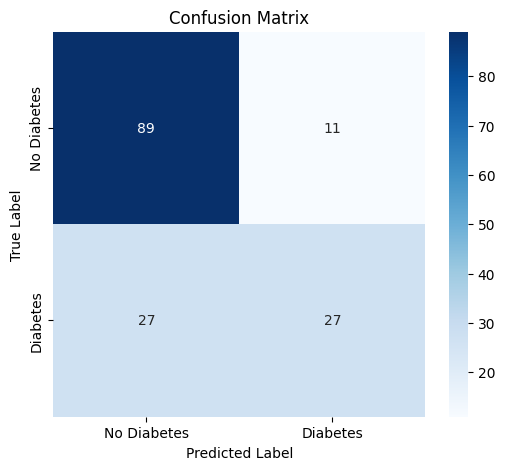

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred_probs = model.predict(test_X)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(test_y, axis=1)  # Convert one-hot to class labels

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
